In [163]:
from fktools import *
import tensorflow as tf
import sklearn

In [164]:
test_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax'),
])

test_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='kld',
    metrics=['acc']
)
test_model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,256 (20.53 KB)

 Trainable params: 5,256 (20.53 KB)

 Non-trainable params: 0 (0.00 B)

In [165]:
X = np.load("dataset_X.npz")['arr_0']
y = np.load("dataset_y.npz")['arr_0']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (392, 8)
y shape: (392, 8)


In [166]:
# X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

# print(f"X train size: {X_train.shape}")
# print(f"X test size: {X_test.shape}")

In [167]:
history = test_model.fit(
    X, y,
    epochs=300,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/300


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 210ms/step - acc: 0.1534 - loss: 1.0130 - val_acc: 0.0759 - val_loss: 1.0913
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.1981 - loss: 1.0100 - val_acc: 0.1013 - val_loss: 1.0883
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2045 - loss: 1.0072 - val_acc: 0.1139 - val_loss: 1.0853
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2173 - loss: 1.0044 - val_acc: 0.1139 - val_loss: 1.0822
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2268 - loss: 1.0018 - val_acc: 0.1646 - val_loss: 1.0793
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2620 - loss: 0.9991 - val_acc: 0.1646 - val_loss: 1.0764
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2652 - loss: 0.9964 - val_acc: 0.1772 - val_loss: 1.0737
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2843 - loss: 0.9939 - val_acc: 0.2911 - val_loss: 1.0708
Epoch 9/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3067 - loss: 0

In [168]:
loss = history.history['loss']
acc = history.history['acc']

val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

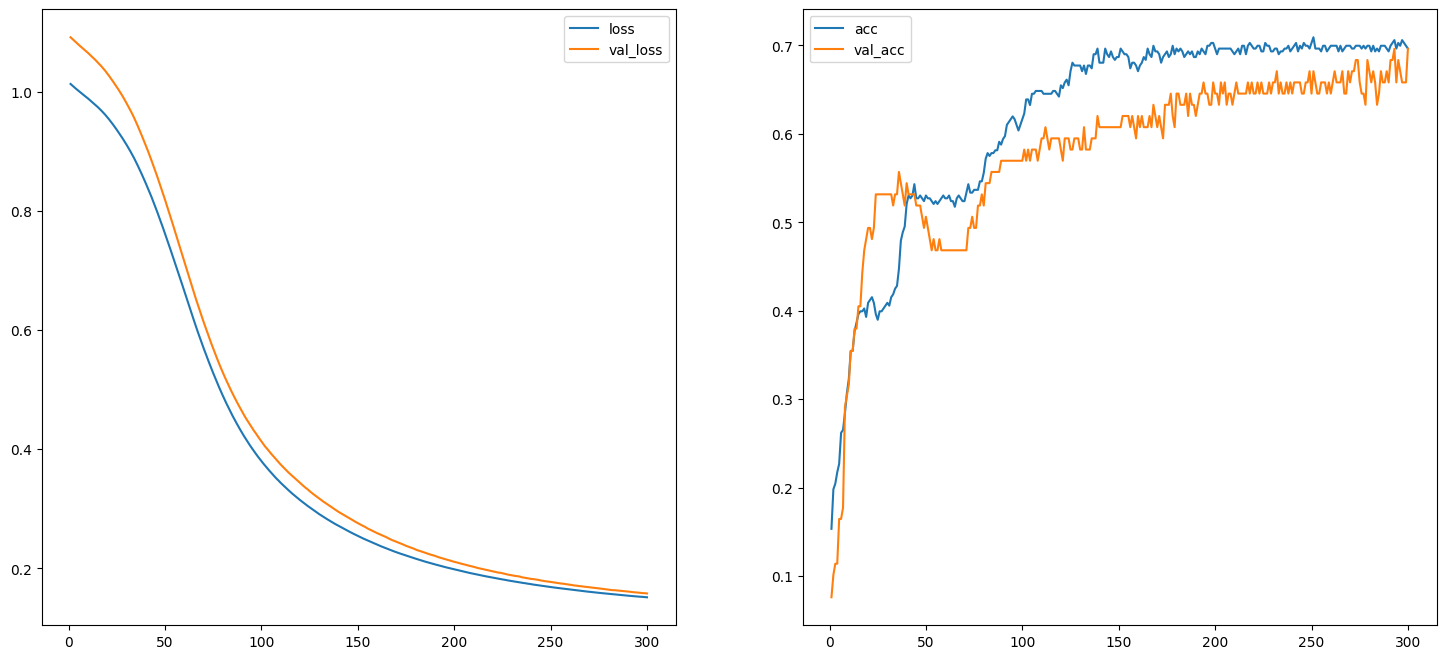

In [169]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
ax[0].plot(epochs, loss, label="loss")
ax[0].plot(epochs, val_loss, label="val_loss")
ax[0].legend()
ax[1].plot(epochs, acc, label="acc")
ax[1].plot(epochs, val_acc, label="val_acc")
ax[1].legend()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


Text(0.5, 1.0, 'should be')

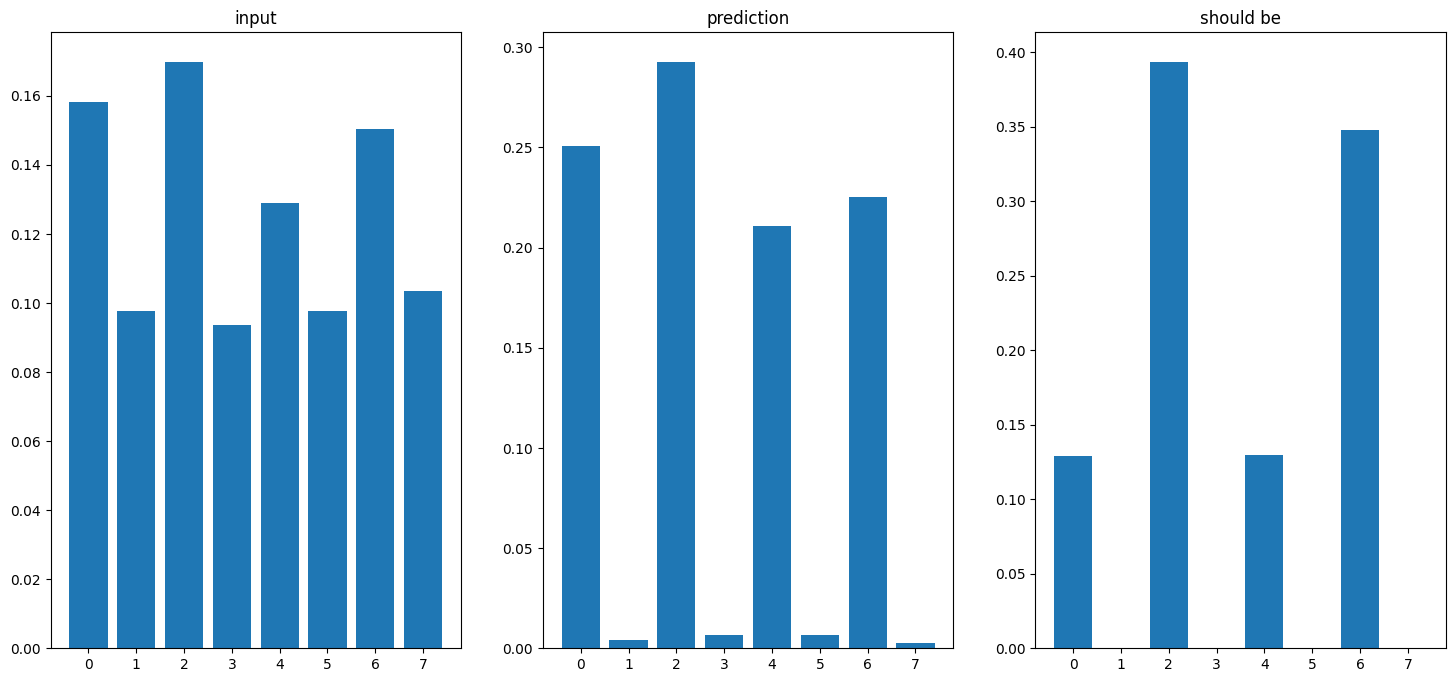

In [172]:
i = 0

pred = test_model.predict(np.array([X[i]]))[0]

xs = np.arange(len(X[i]))

fig, ax = plt.subplots(ncols=3, figsize=(18,8))
ax[0].bar(xs, X[i])
ax[0].set_title("input")
ax[1].bar(xs, pred)
ax[1].set_title("prediction")
ax[2].bar(xs, y[i])
ax[2].set_title("should be")